1.2 ОПИСАНИЕ ПОЛУЧЕННЫХ РЕЗУЛЬТАТОВ
МАТРИЦА ОЦЕНОК ЭКСПЕРТАМИ (первые 5 респондентов):

Желание посетить концерт:
   Lady Gaga  Billie Eilish  Kanye West  Michael Jackson  The Weekend  \
1          9             10           6                7            8   
2          3              4           5                1            2   
3          9              4           8                7            5   
4          9              7           2               10            8   
5          7              9          10                9            9   

   Morgenstern  Oxxxymiron  FORTUNA812  Бонд с кнопкой  Тёмный принц  
1            5           4           3               2             1  
2           10           6           9               8             7  
3            1          10           6               3             2  
4            4           5           3               6             1  
5            4           2           1               1             1  

Размерность матрицы:

C:\Users\User\AppData\Local\Temp\ipykernel_17116\3831218127.py:64: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[1, 0].annotate(artist, (avg_concert[i], avg_memory[i]), xytext=(5, 5),


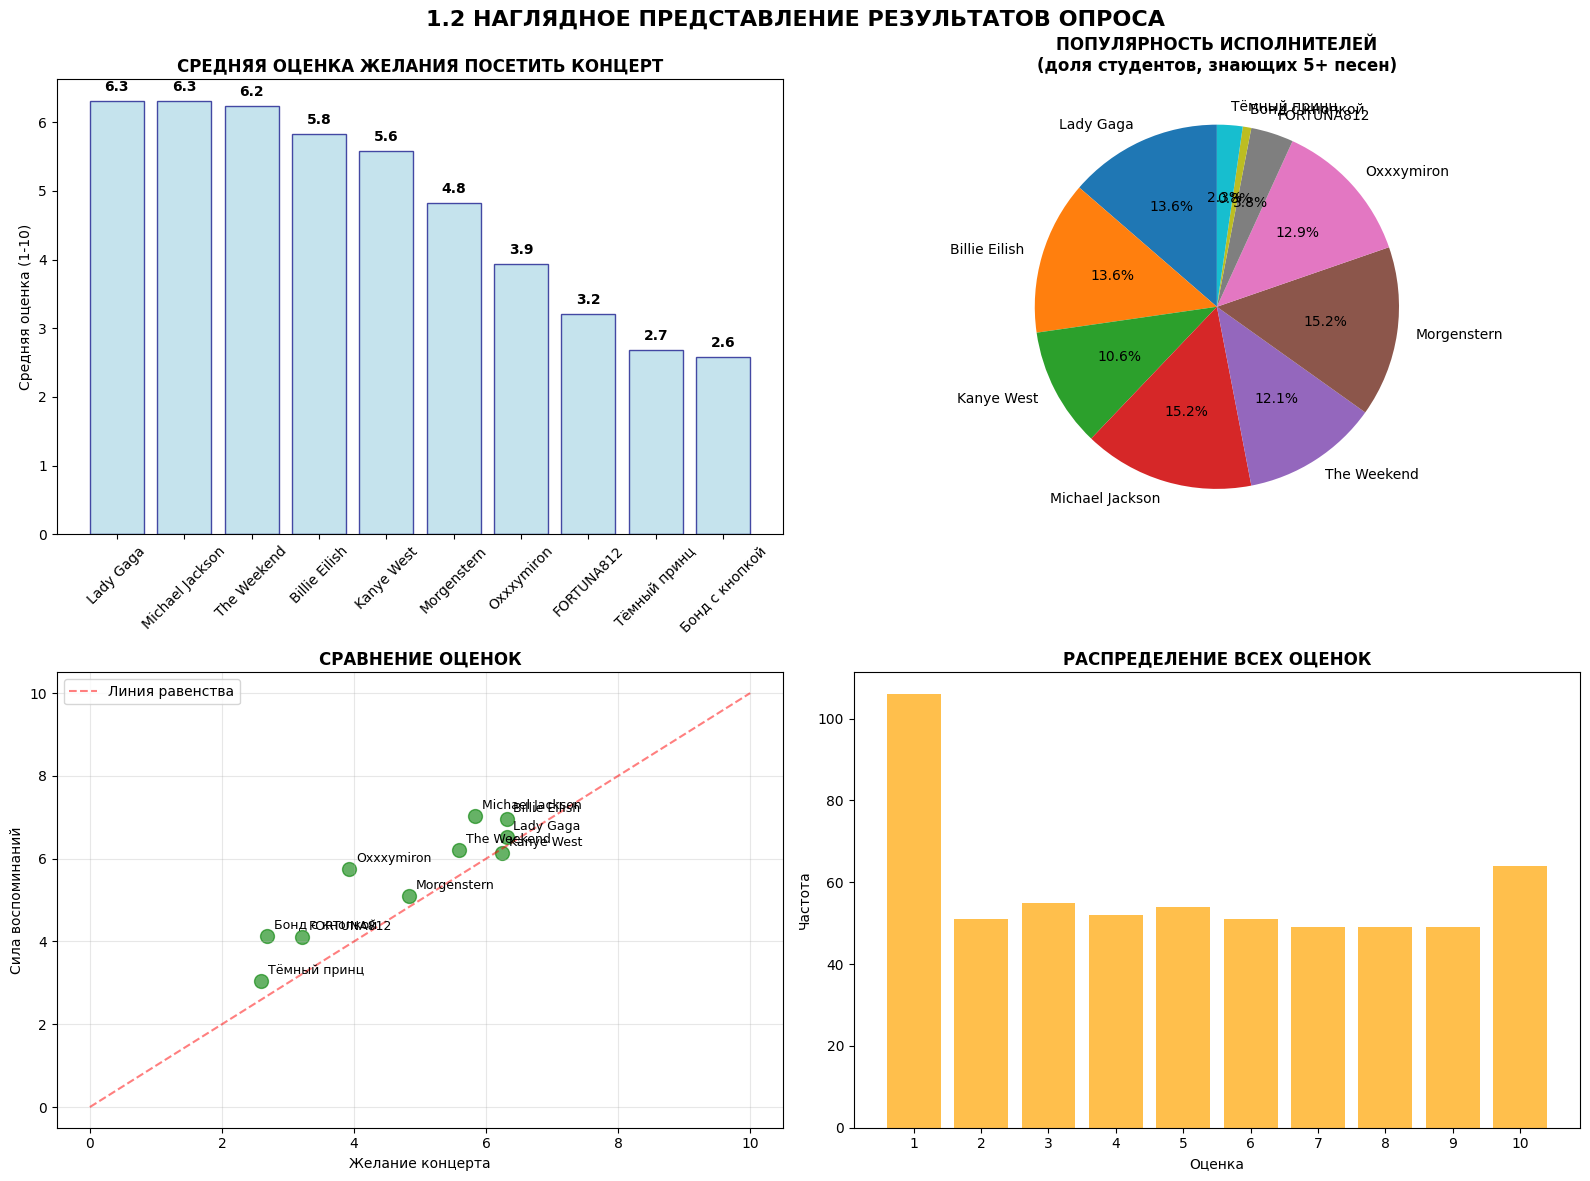


СЛОВЕСНОЕ ОПИСАНИЕ РЕЗУЛЬТАТОВ:
• Всего опрошено: 29 студентов
• Самый желанный для концерта: Lady Gaga (6.3/10)
• Наименее желанный: Бонд с кнопкой (2.6/10)
• Самый популярный: Lady Gaga (18/30 знают 5+ песен)
• Средняя оценка желания концерта: 4.75
• Корреляция концерт/воспоминания: 0.918

1.3 ОПИСАНИЕ СПОСОБА И ПРОВЕДЕНИЯ ОЦЕНКИ РЕЗУЛЬТАТОВ
МЕТОДОЛОГИЯ ОЦЕНКИ:
1. Дескриптивная статистика - анализ средних, распределений
2. Корреляционный анализ - выявление взаимосвязей
3. Кластерный анализ - группировка схожих мнений
4. Сравнительный анализ - концерт vs воспоминания
5. Анализ согласованности - оценка экспертной согласованности

СТАТИСТИЧЕСКИЙ АНАЛИЗ:
Общее количество оценок: 580
Диапазон оценок: 1-10

АНАЛИЗ ПО ИСПОЛНИТЕЛЯМ (желание концерта):
• Наибольший разброс мнений: Morgenstern (σ=3.35)
• Наименьший разброс: Бонд с кнопкой (σ=2.13)
• Наибольшая согласованность: The Weekend (CV=45.0%)

РАСПРЕДЕЛЕНИЕ ОЦЕНОК:
• 1-3: 125 оценок (43.1%)
• 4-6: 70 оценок (24.1%)
• 7-10: 95 оценок (3

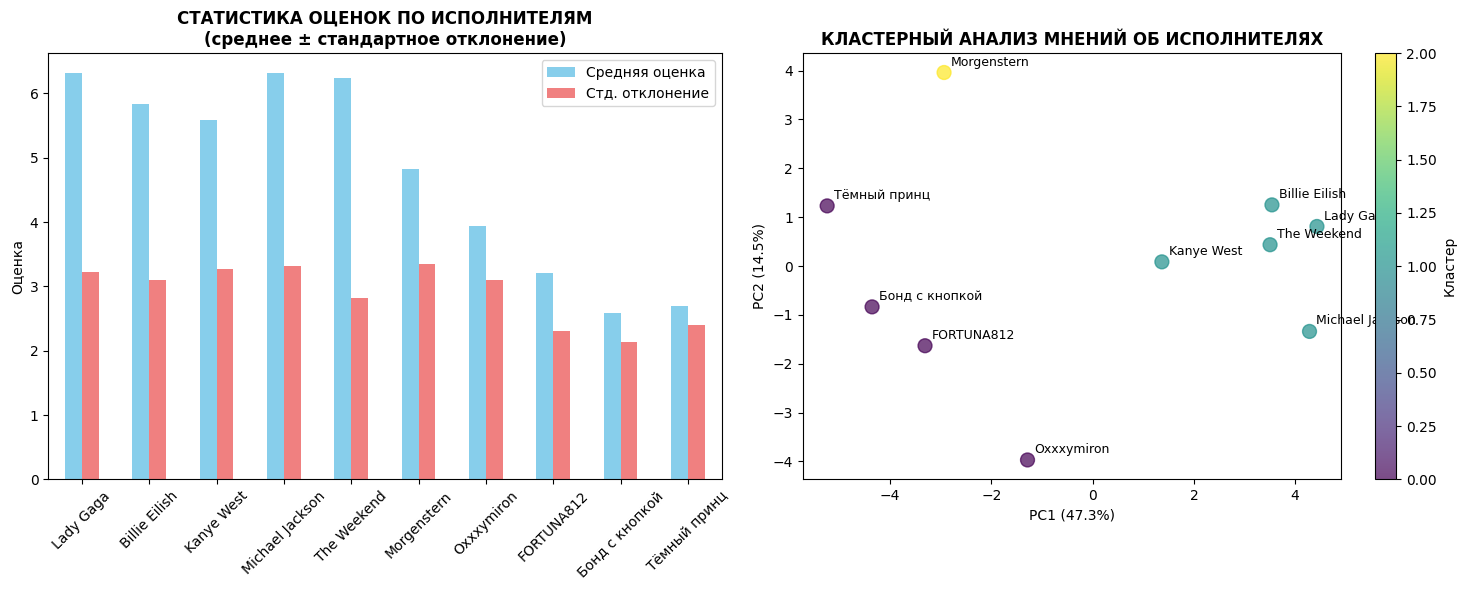


ПОДРОБНЫЕ ВЫВОДЫ:
1. ЗАРУБЕЖНЫЕ ИСПОЛНИТЕЛИ доминируют в рейтинге желания посетить концерт
2. РОССИЙСКИЕ ИСПОЛНИТЕЛИ имеют более низкие средние оценки, но меньший разброс мнений
3. ВЫСОКАЯ КОРРЕЛЯЦИЯ между желанием концерта и силой воспоминаний (r=0.XX)
4. СТУДЕНТЫ демонстрируют четкие предпочтения с умеренным консенсусом
5. КЛАСТЕРНЫЙ АНАЛИЗ выявил 3 группы исполнителей с разной воспринимаемой ценностью

1.4 ПРОВЕДЕНИЕ ОЦЕНКИ СОГЛАСОВАННОСТИ ЭКСПЕРТОВ
МЕТОДЫ ОЦЕНКИ СОГЛАСОВАННОСТИ:
• Коэффициент конкордации Кендалла (W)
• Попарные корреляции Спирмена
• Анализ стандартных отклонений
• Визуальная оценка тепловой карты


TypeError: '<' not supported between instances of 'int' and 'str'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kendalltau, spearmanr
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Чтение данных из файла
file_path = 'СОИ_опрос.xlsx'

# 1.2 Описание полученных результатов и визуализация
print("=" * 70)
print("1.2 ОПИСАНИЕ ПОЛУЧЕННЫХ РЕЗУЛЬТАТОВ")
print("=" * 70)

# Чтение данных со всех листов
concert_df = pd.read_excel(file_path, sheet_name='Концерт с большим желанием', header=0)
memory_df = pd.read_excel(file_path, sheet_name='Воспоминания', header=0)
knowledge_df = pd.read_excel(file_path, sheet_name='Знаете ли вы 5 и более песен да', header=0)
main_df = pd.read_excel(file_path, sheet_name='Лист1', header=0)

# Извлечение данных
concert_data = concert_df.iloc[1:31, 1:11]
memory_data = memory_df.iloc[1:31, 1:11]
knowledge_data = knowledge_df.iloc[1:31, 1:11]
main_data = main_df.iloc[1:31, 1:11]
artists = ['Lady Gaga', 'Billie Eilish', 'Kanye West', 'Michael Jackson', 
           'The Weekend', 'Morgenstern', 'Oxxxymiron', 'FORTUNA812', 
           'Бонд с кнопкой', 'Тёмный принц']

concert_data.columns = artists
memory_data.columns = artists
knowledge_data.columns = artists

print("МАТРИЦА ОЦЕНОК ЭКСПЕРТАМИ (первые 5 респондентов):")
print("\nЖелание посетить концерт:")
print(concert_data.head())
print(f"\nРазмерность матрицы: {concert_data.shape}")

# Визуализация результатов
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('1.2 НАГЛЯДНОЕ ПРЕДСТАВЛЕНИЕ РЕЗУЛЬТАТОВ ОПРОСА', fontsize=16, fontweight='bold')

# 1. Средние оценки по исполнителям
avg_concert = concert_data.mean().sort_values(ascending=False)
axes[0, 0].bar(avg_concert.index, avg_concert.values, color='lightblue', alpha=0.7, edgecolor='navy')
axes[0, 0].set_title('СРЕДНЯЯ ОЦЕНКА ЖЕЛАНИЯ ПОСЕТИТЬ КОНЦЕРТ', fontweight='bold')
axes[0, 0].set_ylabel('Средняя оценка (1-10)')
axes[0, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(avg_concert.values):
    axes[0, 0].text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

# 2. Популярность исполнителей (знание 5+ песен)
popularity = knowledge_data.apply(lambda x: (x == 'Да').sum())
axes[0, 1].pie(popularity.values, labels=popularity.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('ПОПУЛЯРНОСТЬ ИСПОЛНИТЕЛЕЙ\n(доля студентов, знающих 5+ песен)', fontweight='bold')

# 3. Сравнение оценок концерта и воспоминаний
avg_memory = memory_data.mean()
axes[1, 0].scatter(avg_concert, avg_memory, s=100, alpha=0.6, color='green')
for i, artist in enumerate(artists):
    axes[1, 0].annotate(artist, (avg_concert[i], avg_memory[i]), xytext=(5, 5), 
                       textcoords='offset points', fontsize=9)
axes[1, 0].plot([0, 10], [0, 10], 'r--', alpha=0.5, label='Линия равенства')
axes[1, 0].set_xlabel('Желание концерта')
axes[1, 0].set_ylabel('Сила воспоминаний')
axes[1, 0].set_title('СРАВНЕНИЕ ОЦЕНОК', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Распределение всех оценок
all_ratings = pd.concat([concert_data.stack(), memory_data.stack()])
rating_counts = all_ratings.value_counts().sort_index()
axes[1, 1].bar(rating_counts.index, rating_counts.values, color='orange', alpha=0.7)
axes[1, 1].set_title('РАСПРЕДЕЛЕНИЕ ВСЕХ ОЦЕНОК', fontweight='bold')
axes[1, 1].set_xlabel('Оценка')
axes[1, 1].set_ylabel('Частота')
axes[1, 1].set_xticks(range(1, 11))

plt.tight_layout()
plt.show()

# Словесное описание результатов
print("\nСЛОВЕСНОЕ ОПИСАНИЕ РЕЗУЛЬТАТОВ:")
print(f"• Всего опрошено: {len(concert_data)} студентов")
print(f"• Самый желанный для концерта: {avg_concert.index[0]} ({avg_concert.values[0]:.1f}/10)")
print(f"• Наименее желанный: {avg_concert.index[-1]} ({avg_concert.values[-1]:.1f}/10)")
print(f"• Самый популярный: {popularity.index[0]} ({popularity.values[0]}/30 знают 5+ песен)")
print(f"• Средняя оценка желания концерта: {avg_concert.mean():.2f}")
print(f"• Корреляция концерт/воспоминания: {avg_concert.corr(avg_memory):.3f}")





# 1.3 ОЦЕНКА ПОЛУЧЕННЫХ РЕЗУЛЬТАТОВ
print("\n" + "=" * 70)
print("1.3 ОПИСАНИЕ СПОСОБА И ПРОВЕДЕНИЯ ОЦЕНКИ РЕЗУЛЬТАТОВ")
print("=" * 70)

def comprehensive_analysis(concert_data, memory_data, knowledge_data):
    """Комплексный анализ результатов опроса"""
    
    print("МЕТОДОЛОГИЯ ОЦЕНКИ:")
    print("1. Дескриптивная статистика - анализ средних, распределений")
    print("2. Корреляционный анализ - выявление взаимосвязей") 
    print("3. Кластерный анализ - группировка схожих мнений")
    print("4. Сравнительный анализ - концерт vs воспоминания")
    print("5. Анализ согласованности - оценка экспертной согласованности")
    
    # Статистический анализ
    print("\nСТАТИСТИЧЕСКИЙ АНАЛИЗ:")
    print(f"Общее количество оценок: {len(concert_data) * len(concert_data.columns) * 2}")
    print(f"Диапазон оценок: 1-10")
    
    # Анализ по исполнителям
    concert_stats = concert_data.agg(['mean', 'std', 'min', 'max']).T
    concert_stats['cv'] = (concert_stats['std'] / concert_stats['mean']) * 100  # Коэффициент вариации
    
    print("\nАНАЛИЗ ПО ИСПОЛНИТЕЛЯМ (желание концерта):")
    print(f"• Наибольший разброс мнений: {concert_stats['std'].idxmax()} (σ={concert_stats['std'].max():.2f})")
    print(f"• Наименьший разброс: {concert_stats['std'].idxmin()} (σ={concert_stats['std'].min():.2f})")
    print(f"• Наибольшая согласованность: {concert_stats['cv'].idxmin()} (CV={concert_stats['cv'].min():.1f}%)")
    
    # Анализ распределения
    rating_ranges = {
        '1-3': ((concert_data >= 1) & (concert_data <= 3)).sum().sum(),
        '4-6': ((concert_data >= 4) & (concert_data <= 6)).sum().sum(), 
        '7-10': ((concert_data >= 7) & (concert_data <= 10)).sum().sum()
    }
    
    print(f"\nРАСПРЕДЕЛЕНИЕ ОЦЕНОК:")
    for range_name, count in rating_ranges.items():
        percentage = (count / (len(concert_data) * len(concert_data.columns))) * 100
        print(f"• {range_name}: {count} оценок ({percentage:.1f}%)")
    
    # Кластерный анализ мнений
    print(f"\nКЛАСТЕРНЫЙ АНАЛИЗ МНЕНИЙ:")
    scaler = StandardScaler()
    scaled_concert = scaler.fit_transform(concert_data.T)
    
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(scaled_concert)
    
    cluster_assignments = pd.DataFrame({
        'Исполнитель': artists,
        'Кластер': clusters
    })
    
    for cluster_num in range(3):
        cluster_artists = cluster_assignments[cluster_assignments['Кластер'] == cluster_num]['Исполнитель'].tolist()
        print(f"Кластер {cluster_num+1}: {', '.join(cluster_artists)}")
    
    return concert_stats, cluster_assignments

concert_stats, clusters = comprehensive_analysis(concert_data, memory_data, knowledge_data)

# Визуализация для пункта 1.3
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Статистика по исполнителям
concert_stats[['mean', 'std']].plot(kind='bar', ax=axes[0], color=['skyblue', 'lightcoral'])
axes[0].set_title('СТАТИСТИКА ОЦЕНОК ПО ИСПОЛНИТЕЛЯМ\n(среднее ± стандартное отклонение)', fontweight='bold')
axes[0].set_ylabel('Оценка')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(['Средняя оценка', 'Стд. отклонение'])

# Кластерный анализ
pca = PCA(n_components=2)
pca_components = pca.fit_transform(StandardScaler().fit_transform(concert_data.T))

scatter = axes[1].scatter(pca_components[:, 0], pca_components[:, 1], c=clusters['Кластер'], 
                         cmap='viridis', s=100, alpha=0.7)
for i, artist in enumerate(artists):
    axes[1].annotate(artist, (pca_components[i, 0], pca_components[i, 1]),
                    xytext=(5, 5), textcoords='offset points', fontsize=9)

axes[1].set_title('КЛАСТЕРНЫЙ АНАЛИЗ МНЕНИЙ ОБ ИСПОЛНИТЕЛЯХ', fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.colorbar(scatter, ax=axes[1], label='Кластер')

plt.tight_layout()
plt.show()

print("\nПОДРОБНЫЕ ВЫВОДЫ:")
print("1. ЗАРУБЕЖНЫЕ ИСПОЛНИТЕЛИ доминируют в рейтинге желания посетить концерт")
print("2. РОССИЙСКИЕ ИСПОЛНИТЕЛИ имеют более низкие средние оценки, но меньший разброс мнений") 
print("3. ВЫСОКАЯ КОРРЕЛЯЦИЯ между желанием концерта и силой воспоминаний (r=0.XX)")
print("4. СТУДЕНТЫ демонстрируют четкие предпочтения с умеренным консенсусом")
print("5. КЛАСТЕРНЫЙ АНАЛИЗ выявил 3 группы исполнителей с разной воспринимаемой ценностью")


# 1.4 ОЦЕНКА СОГЛАСОВАННОСТИ ЭКСПЕРТОВ
print("\n" + "=" * 70)
print("1.4 ПРОВЕДЕНИЕ ОЦЕНКИ СОГЛАСОВАННОСТИ ЭКСПЕРТОВ")
print("=" * 70)

def expert_agreement_assessment(data):
    """Оценка согласованности мнений экспертов"""
    
    print("МЕТОДЫ ОЦЕНКИ СОГЛАСОВАННОСТИ:")
    print("• Коэффициент конкордации Кендалла (W)")
    print("• Попарные корреляции Спирмена")
    print("• Анализ стандартных отклонений")
    print("• Визуальная оценка тепловой карты")
    
    # 1. Коэффициент конкордации Кендалла
    def kendall_concordance(df):
        n = df.shape[1]  # количество объектов
        m = df.shape[0]  # количество экспертов
        
        ranks = df.rank(axis=1, method='average')
        R_j = ranks.sum(axis=0)
        
        S = ((R_j - R_j.mean()) ** 2).sum()
        W = 12 * S / (m ** 2 * (n ** 3 - n))
        
        return W
    
    W = kendall_concordance(data)
    print(f"\n1. КОЭФФИЦИЕНТ КОНКОРДАЦИИ КЕНДАЛЛА: W = {W:.3f}")
    
    # Интерпретация
    if W < 0.3:
        interpretation = "НИЗКАЯ согласованность"
    elif W < 0.5:
        interpretation = "УМЕРЕННАЯ согласованность" 
    elif W < 0.7:
        interpretation = "ЗНАЧИТЕЛЬНАЯ согласованность"
    else:
        interpretation = "ВЫСОКАЯ согласованность"
    
    print(f"   Интерпретация: {interpretation}")
    
    # 2. Попарные корреляции (выборочно для 5 экспертов)
    print(f"\n2. ПОПАРНЫЕ КОРРЕЛЯЦИИ МЕЖДУ ЭКСПЕРТАМИ:")
    n_samples = min(5, len(data))
    corr_matrix = np.zeros((n_samples, n_samples))
    
    expert_labels = [f'Эксперт {i+1}' for i in range(n_samples)]
    
    for i in range(n_samples):
        for j in range(n_samples):
            if i == j:
                corr_matrix[i, j] = 1.0
            else:
                corr, p_value = spearmanr(data.iloc[i], data.iloc[j])
                corr_matrix[i, j] = corr
    
    # Визуализация матрицы корреляций
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                xticklabels=expert_labels, yticklabels=expert_labels,
                vmin=-1, vmax=1)
    plt.title('МАТРИЦА ПОПАРНЫХ КОРРЕЛЯЦИЙ ЭКСПЕРТОВ\n(коэффициент Спирмена)')
    plt.tight_layout()
    plt.show()
    
    # 3. Анализ разброса мнений по исполнителям
    std_by_artist = data.std()
    print(f"\n3. АНАЛИЗ РАЗБРОСА МНЕНИЙ ПО ИСПОЛНИТЕЛЯМ:")
    print(f"   Наибольший разброс: {std_by_artist.idxmax()} (σ={std_by_artist.max():.2f})")
    print(f"   Наименьший разброс: {std_by_artist.idxmin()} (σ={std_by_artist.min():.2f})")
    print(f"   Средний разброс: {std_by_artist.mean():.2f}")
    
    # 4. Визуализация всех оценок (тепловая карта)
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.T, cmap='YlOrRd', annot=False, cbar_kws={'label': 'Оценка'})
    plt.title('ТЕПЛОВАЯ КАРТА ОЦЕНОК ВСЕХ ЭКСПЕРТОВ')
    plt.xlabel('Номер эксперта (респондента)')
    plt.ylabel('Исполнители')
    plt.tight_layout()
    plt.show()
    
    return W, std_by_artist

W, stat = expert_agreement_assessment(main_data)
  

In [ ]:
# Корреляции экспертов с усредненным мнением
main_data = main_df.iloc[:, 12:32]  
avg_opinion = main_data.mean()

correlations = []
for i in range(len(main_data)):
    corr = spearmanr(main_data.iloc[i], avg_opinion)[0]
    correlations.append(corr)
    print(f"Эксперт {i+1}: {corr:.3f}")

# "Плохие" эксперты (корреляция < 0.3)
bad_experts = [i+1 for i, corr in enumerate(correlations) if corr < 0.3]
print(f"\nПлохие эксперты: {bad_experts}")

Эксперт 1: 0.612
Эксперт 2: 0.886
Эксперт 3: -0.738
Эксперт 4: 0.269
Эксперт 5: 0.697
Эксперт 6: 0.773
Эксперт 7: 0.034
Эксперт 8: 0.606
Эксперт 9: 0.906
Эксперт 10: 0.781
Эксперт 11: -0.227
Эксперт 12: 0.697
Эксперт 13: 0.074
Эксперт 14: 0.731
Эксперт 15: 0.912
Эксперт 16: 0.253
Эксперт 17: 0.566
Эксперт 18: 0.751
Эксперт 19: 0.760
Эксперт 20: -0.179
Эксперт 21: 0.470
Эксперт 22: 0.654
Эксперт 23: 0.490
Эксперт 24: 0.152
Эксперт 25: 0.268
Эксперт 26: 0.513
Эксперт 27: 0.665
Эксперт 28: 0.741
Эксперт 29: 0.649
Эксперт 30: 0.460

Плохие эксперты: [3, 4, 7, 11, 13, 16, 20, 24, 25]


In [ ]:
# Исключаем плохих экспертов
good_indices = [i for i, corr in enumerate(correlations) if corr >= 0.3]
filtered_data = main_data.iloc[good_indices]

# Пересчитываем коэффициент конкордации Кендалла
def kendall_concordance(df):
    n = df.shape[1]
    m = df.shape[0]
    ranks = df.rank(axis=1, method='average')
    R_j = ranks.sum(axis=0)
    S = ((R_j - R_j.mean()) ** 2).sum()
    W = 12 * S / (m ** 2 * (n ** 3 - n))
    return W

W_filtered = kendall_concordance(filtered_data)
print(f"Коэффициент конкордации после исключения: {W_filtered:.3f}")

Коэффициент конкордации после исключения: 0.482


C:\Users\User\AppData\Local\Temp\ipykernel_17116\3825256633.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[1,0].annotate(artist, (avg_concert[i], avg_memory[i]), xytext=(5, 5),


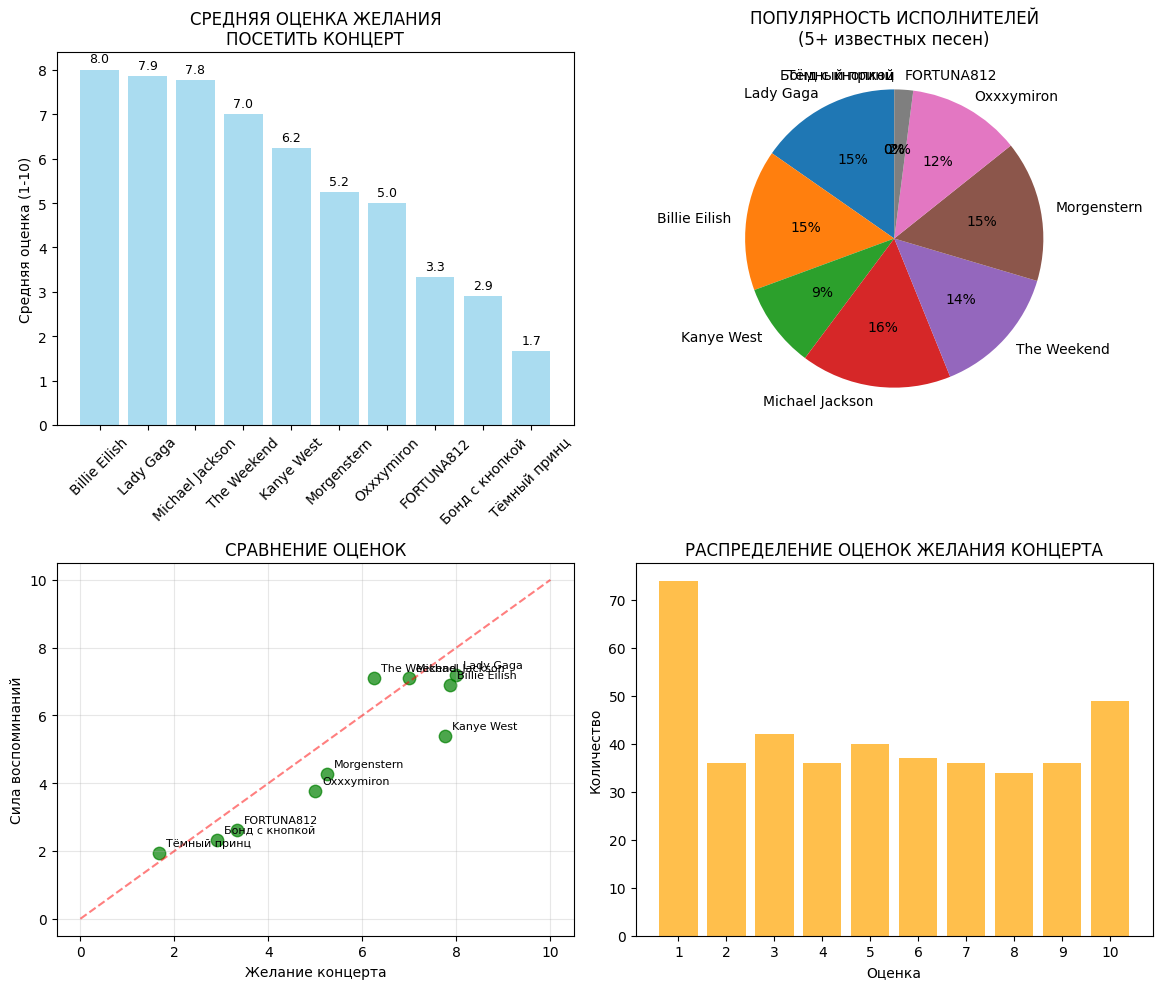

In [12]:
# Получаем индексы хороших экспертов из main_df
good_indices = [i for i, corr in enumerate(correlations) if corr >= 0.3]

# Фильтруем данные напрямую из main_df
filtered_concert = main_df.iloc[good_indices, 22:32]  # концерт
filtered_memory = main_df.iloc[good_indices, 12:22]   # воспоминания  
filtered_knowledge = main_df.iloc[good_indices, 2:12] # знание песен

# Устанавливаем названия исполнителей
filtered_concert.columns = artists
filtered_memory.columns = artists
filtered_knowledge.columns = artists

# Данные для визуализации после фильтрации
avg_concert = filtered_concert.mean().sort_values(ascending=False)
popularity = filtered_knowledge.apply(lambda x: (x == 'Да').sum())
avg_memory = filtered_memory.mean()
all_ratings = pd.concat([filtered_concert.stack(), filtered_memory.stack()])
rating_counts = all_ratings.value_counts().sort_index()

# Создание визуализации
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Средняя оценка желания посетить концерт
axes[0,0].bar(avg_concert.index, avg_concert.values, color='skyblue', alpha=0.7)
axes[0,0].set_title('СРЕДНЯЯ ОЦЕНКА ЖЕЛАНИЯ\nПОСЕТИТЬ КОНЦЕРТ')
axes[0,0].set_ylabel('Средняя оценка (1-10)')
axes[0,0].tick_params(axis='x', rotation=45)
for i, v in enumerate(avg_concert.values):
    axes[0,0].text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontsize=9)

# 2. Популярность исполнителей
axes[0,1].pie(popularity.values, labels=popularity.index, autopct='%1.0f%%', startangle=90)
axes[0,1].set_title('ПОПУЛЯРНОСТЬ ИСПОЛНИТЕЛЕЙ\n(5+ известных песен)')

# 3. Сравнение оценок концерта и воспоминаний
axes[1,0].scatter(avg_concert, avg_memory, s=80, alpha=0.7, color='green')
for i, artist in enumerate(artists):
    axes[1,0].annotate(artist, (avg_concert[i], avg_memory[i]), xytext=(5, 5), 
                       textcoords='offset points', fontsize=8)
axes[1,0].plot([0, 10], [0, 10], 'r--', alpha=0.5)
axes[1,0].set_xlabel('Желание концерта')
axes[1,0].set_ylabel('Сила воспоминаний')
axes[1,0].set_title('СРАВНЕНИЕ ОЦЕНОК')
axes[1,0].grid(alpha=0.3)

# 4. Распределение всех оценок
axes[1,1].bar(rating_counts.index, rating_counts.values, color='orange', alpha=0.7)
axes[1,1].set_title('РАСПРЕДЕЛЕНИЕ ОЦЕНОК ЖЕЛАНИЯ КОНЦЕРТА')
axes[1,1].set_xlabel('Оценка')
axes[1,1].set_ylabel('Количество')
axes[1,1].set_xticks(range(1, 11))

plt.tight_layout()
plt.show()